In [1]:
import pandas as pd
import random
import numpy as np
from itertools import product

from sklearn.preprocessing import LabelEncoder

from pycaret.regression import *
from pycaret.time_series import *

import os

import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
DATA_DIR = './data/'

In [3]:
FILE_NAME1 = 'Real_estate_transaction_data1(공공데이터-1273500).csv'
FILE_NAME2 = 'Real_estate_transaction_data2(공공데이터-1273501~).csv'

In [4]:
file1 = pd.read_csv(DATA_DIR + FILE_NAME1)
file2 = pd.read_csv(DATA_DIR + FILE_NAME2)
file = pd.concat([file1,file2])

In [6]:
data_df = file.copy()
data_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
data_df

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2024,11530,구로구,10800,오류동,1.0,대지,6.0,244.0,J팰리스,...,18000,29.24,17.63,4.0,NaN,NaN,2011.0,연립다세대,중개거래,서울 성북구
1,2024,11560,영등포구,12600,양평동2가,1.0,대지,43.0,14.0,CO-OP Residence/오목교,...,7600,16.98,26.58,9.0,NaN,NaN,2004.0,오피스텔,중개거래,서울 영등포구
2,2024,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,...,55200,37.08,156.00,0.0,NaN,NaN,1985.0,단독다가구,중개거래,서울 양천구
3,2024,11680,강남구,10100,역삼동,1.0,대지,781.0,37.0,781-37,...,67000,44.85,25.88,3.0,NaN,NaN,2017.0,연립다세대,중개거래,서울 강남구
4,2024,11380,은평구,10800,역촌동,1.0,대지,80.0,70.0,더라온,...,35000,54.37,33.25,4.0,NaN,NaN,2019.0,연립다세대,중개거래,서울 마포구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273995,2006,11590,동작구,10200,상도동,1.0,대지,214.0,446.0,원형맨션(나동),...,10000,64.33,32.98,4.0,NaN,NaN,2002.0,연립다세대,NaN,NaN
1273996,2006,11470,양천구,10100,신정동,1.0,대지,329.0,0.0,목동신시가지14,...,26900,55.02,0.00,2.0,NaN,NaN,1987.0,아파트,NaN,NaN
1273997,2006,11350,노원구,10200,월계동,1.0,대지,13.0,0.0,미륭,...,12700,51.48,0.00,12.0,NaN,NaN,1986.0,아파트,NaN,NaN
1273998,2006,11470,양천구,10100,신정동,1.0,대지,312.0,0.0,목동신시가지9,...,86000,106.93,0.00,13.0,NaN,NaN,1987.0,아파트,NaN,NaN


## 2024년을 기준으로 10년간의 데이터 확인

- ACC_YEAR : 접수연도
- SGG_CD : 자치구코드
- SGG_NM : 자치구명
- BJDONG_CD : 법정동코드
- BJDONG_NM : 법정동명
- LAND_GBN : 지번구분
- LAND_GBN_NM : 지번구분명
- BONBEON : 본번
- BUBEON : 부번
- BLDG_NM : 건물명
- DEAL_YMD : 계약일
- OBJ_AMT : 물건금액(만원)
- BLDG_AREA : 건물면적
- TOT_AREA : 토지면적
- FLOOR : 층
- RIGHT_GBN : 권리구분
- CNTL_YMD : 취소일
- BUILD_YEAR : 건축년도
- HOUSE_TYPE : 건물용도
- REQ_GBN : 신고구분
- RDEALER_LAWDNM : 신고한 개업공인중개사 시군구명

### 계약일을 기준으로 2014 ~ 2024년 데이터 추출

In [7]:
data_df

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2024,11530,구로구,10800,오류동,1.0,대지,6.0,244.0,J팰리스,...,18000,29.24,17.63,4.0,NaN,NaN,2011.0,연립다세대,중개거래,서울 성북구
1,2024,11560,영등포구,12600,양평동2가,1.0,대지,43.0,14.0,CO-OP Residence/오목교,...,7600,16.98,26.58,9.0,NaN,NaN,2004.0,오피스텔,중개거래,서울 영등포구
2,2024,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,...,55200,37.08,156.00,0.0,NaN,NaN,1985.0,단독다가구,중개거래,서울 양천구
3,2024,11680,강남구,10100,역삼동,1.0,대지,781.0,37.0,781-37,...,67000,44.85,25.88,3.0,NaN,NaN,2017.0,연립다세대,중개거래,서울 강남구
4,2024,11380,은평구,10800,역촌동,1.0,대지,80.0,70.0,더라온,...,35000,54.37,33.25,4.0,NaN,NaN,2019.0,연립다세대,중개거래,서울 마포구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273995,2006,11590,동작구,10200,상도동,1.0,대지,214.0,446.0,원형맨션(나동),...,10000,64.33,32.98,4.0,NaN,NaN,2002.0,연립다세대,NaN,NaN
1273996,2006,11470,양천구,10100,신정동,1.0,대지,329.0,0.0,목동신시가지14,...,26900,55.02,0.00,2.0,NaN,NaN,1987.0,아파트,NaN,NaN
1273997,2006,11350,노원구,10200,월계동,1.0,대지,13.0,0.0,미륭,...,12700,51.48,0.00,12.0,NaN,NaN,1986.0,아파트,NaN,NaN
1273998,2006,11470,양천구,10100,신정동,1.0,대지,312.0,0.0,목동신시가지9,...,86000,106.93,0.00,13.0,NaN,NaN,1987.0,아파트,NaN,NaN


In [8]:
data_df['DEAL_YMD']

0          20240113
1          20240112
2          20240112
3          20240112
4          20240112
             ...   
1273995    20060107
1273996    20060107
1273997    20060107
1273998    20060107
1273999    20060107
Name: DEAL_YMD, Length: 2548000, dtype: int64

In [9]:
data_df['DEAL_YEAR'] = data_df['DEAL_YMD'].apply(lambda x:int(str(x)[:4]))
data_df['DEAL_MONTH'] = data_df['DEAL_YMD'].apply(lambda x:int(str(x)[4:6]))
data_df['DEAL_DAY'] = data_df['DEAL_YMD'].apply(lambda x:int(str(x)[6:]))
data_df

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM,DEAL_YEAR,DEAL_MONTH,DEAL_DAY
0,2024,11530,구로구,10800,오류동,1.0,대지,6.0,244.0,J팰리스,...,4.0,NaN,NaN,2011.0,연립다세대,중개거래,서울 성북구,2024,1,13
1,2024,11560,영등포구,12600,양평동2가,1.0,대지,43.0,14.0,CO-OP Residence/오목교,...,9.0,NaN,NaN,2004.0,오피스텔,중개거래,서울 영등포구,2024,1,12
2,2024,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,1985.0,단독다가구,중개거래,서울 양천구,2024,1,12
3,2024,11680,강남구,10100,역삼동,1.0,대지,781.0,37.0,781-37,...,3.0,NaN,NaN,2017.0,연립다세대,중개거래,서울 강남구,2024,1,12
4,2024,11380,은평구,10800,역촌동,1.0,대지,80.0,70.0,더라온,...,4.0,NaN,NaN,2019.0,연립다세대,중개거래,서울 마포구,2024,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273995,2006,11590,동작구,10200,상도동,1.0,대지,214.0,446.0,원형맨션(나동),...,4.0,NaN,NaN,2002.0,연립다세대,NaN,NaN,2006,1,7
1273996,2006,11470,양천구,10100,신정동,1.0,대지,329.0,0.0,목동신시가지14,...,2.0,NaN,NaN,1987.0,아파트,NaN,NaN,2006,1,7
1273997,2006,11350,노원구,10200,월계동,1.0,대지,13.0,0.0,미륭,...,12.0,NaN,NaN,1986.0,아파트,NaN,NaN,2006,1,7
1273998,2006,11470,양천구,10100,신정동,1.0,대지,312.0,0.0,목동신시가지9,...,13.0,NaN,NaN,1987.0,아파트,NaN,NaN,2006,1,7


In [10]:
year_list = [year for year in range(2014, 2025)]
data_df = data_df[data_df['DEAL_YEAR'].isin(year_list)]

In [11]:
data_df

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM,DEAL_YEAR,DEAL_MONTH,DEAL_DAY
0,2024,11530,구로구,10800,오류동,1.0,대지,6.0,244.0,J팰리스,...,4.0,NaN,NaN,2011.0,연립다세대,중개거래,서울 성북구,2024,1,13
1,2024,11560,영등포구,12600,양평동2가,1.0,대지,43.0,14.0,CO-OP Residence/오목교,...,9.0,NaN,NaN,2004.0,오피스텔,중개거래,서울 영등포구,2024,1,12
2,2024,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,1985.0,단독다가구,중개거래,서울 양천구,2024,1,12
3,2024,11680,강남구,10100,역삼동,1.0,대지,781.0,37.0,781-37,...,3.0,NaN,NaN,2017.0,연립다세대,중개거래,서울 강남구,2024,1,12
4,2024,11380,은평구,10800,역촌동,1.0,대지,80.0,70.0,더라온,...,4.0,NaN,NaN,2019.0,연립다세대,중개거래,서울 마포구,2024,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228268,2014,11545,금천구,10300,시흥동,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,1988.0,단독다가구,NaN,NaN,2014,1,1
228269,2014,11380,은평구,11400,진관동,1.0,대지,88.0,0.0,은평뉴타운 우물골(두산위브8단지),...,10.0,NaN,NaN,2009.0,아파트,NaN,NaN,2014,1,1
228270,2014,11380,은평구,11400,진관동,1.0,대지,102.0,0.0,은평뉴타운 박석고개(힐스테이트1단지),...,12.0,NaN,NaN,2009.0,아파트,NaN,NaN,2014,1,1
228271,2014,11380,은평구,11400,진관동,1.0,대지,11.0,0.0,은평뉴타운상림마을(현대아이파크B-13),...,9.0,NaN,NaN,2008.0,아파트,NaN,NaN,2014,1,1


## 목표!

- OBJ_AMT 예측하기
1. 결측치 해결
2. 건물명을 학습에 넣을지 확인
3. 구 별로 모델을 만들것인가?
4. 몇 년 후 예측으로 할 것인가(일단은 3년을 목표로)

## 데이터 확인

In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502273 entries, 0 to 228272
Data columns (total 24 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ACC_YEAR        1502273 non-null  int64  
 1   SGG_CD          1502273 non-null  int64  
 2   SGG_NM          1502273 non-null  object 
 3   BJDONG_CD       1502273 non-null  int64  
 4   BJDONG_NM       1502273 non-null  object 
 5   LAND_GBN        1384808 non-null  float64
 6   LAND_GBN_NM     1384808 non-null  object 
 7   BONBEON         1384815 non-null  object 
 8   BUBEON          1384815 non-null  float64
 9   BLDG_NM         1384916 non-null  object 
 10  DEAL_YMD        1502273 non-null  int64  
 11  OBJ_AMT         1502273 non-null  int64  
 12  BLDG_AREA       1502273 non-null  float64
 13  TOT_AREA        1502273 non-null  float64
 14  FLOOR           1502273 non-null  float64
 15  RIGHT_GBN       37018 non-null    object 
 16  CNTL_YMD        22004 non-null    flo

In [13]:
data_df.describe()

,ACC_YEAR,SGG_CD,BJDONG_CD,LAND_GBN,BUBEON,DEAL_YMD,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,CNTL_YMD,BUILD_YEAR,DEAL_YEAR,DEAL_MONTH,DEAL_DAY
count,1.502273e+06,1.502273e+06,1.502273e+06,1.384808e+06,1.384815e+06,1.502273e+06,1.502273e+06,1.502273e+06,1.502273e+06,1.502273e+06,2.200400e+04,1.498408e+06,1.502273e+06,1.502273e+06,1.502273e+06
mean,2.017835e+03,1.145213e+04,1.093936e+04,1.004130e+00,2.625661e+01,2.017852e+07,5.331722e+04,7.377575e+01,3.231382e+02,6.431150e+00,2.021323e+07,1.951003e+03,2.017786e+03,6.410408e+00,1.584804e+01
std,2.583452e+00,1.738313e+02,1.246246e+03,8.799769e-02,1.149007e+02,2.583999e+04,5.902906e+04,6.142975e+01,3.656188e+05,6.009446e+00,1.098315e+04,3.107757e+02,2.584139e+00,3.271121e+00,8.730697e+00
min,2.013000e+03,1.111000e+04,1.010000e+04,1.000000e+00,0.000000e+00,2.014010e+07,3.500000e+02,3.310000e+00,0.000000e+00,-4.000000e+00,2.020022e+07,0.000000e+00,2.014000e+03,1.000000e+00,1.000000e+00
25%,2.016000e+03,1.130500e+04,1.020000e+04,1.000000e+00,0.000000e+00,2.016022e+07,2.300000e+04,4.264000e+01,0.000000e+00,2.000000e+00,2.020102e+07,1.992000e+03,2.016000e+03,4.000000e+00,8.000000e+00
50%,2.018000e+03,1.147000e+04,1.050000e+04,1.000000e+00,1.000000e+00,2.017122e+07,3.750000e+04,5.994000e+01,0.000000e+00,4.000000e+00,2.021073e+07,2.001000e+03,2.017000e+03,6.000000e+00,1.600000e+01
75%,2.020000e+03,1.159000e+04,1.090000e+04,1.000000e+00,1.400000e+01,2.020061e+07,6.400000e+04,8.490000e+01,3.101000e+01,1.000000e+01,2.022083e+07,2.009000e+03,2.020000e+03,9.000000e+00,2.300000e+01
max,2.024000e+03,1.174000e+04,1.870000e+04,3.000000e+00,4.813000e+03,2.024011e+07,1.108778e+07,3.619840e+03,4.481289e+08,9.000000e+01,2.024011e+07,2.023000e+03,2.024000e+03,1.200000e+01,3.100000e+01


## 결측치 확인

In [14]:
data_df.isnull().sum()

ACC_YEAR                0
SGG_CD                  0
SGG_NM                  0
BJDONG_CD               0
BJDONG_NM               0
LAND_GBN           117465
LAND_GBN_NM        117465
BONBEON            117458
BUBEON             117458
BLDG_NM            117357
DEAL_YMD                0
OBJ_AMT                 0
BLDG_AREA               0
TOT_AREA                0
FLOOR                   0
RIGHT_GBN         1465255
CNTL_YMD          1480269
BUILD_YEAR           3865
HOUSE_TYPE              0
REQ_GBN           1353161
RDEALER_LAWDNM    1385991
DEAL_YEAR               0
DEAL_MONTH              0
DEAL_DAY                0
dtype: int64

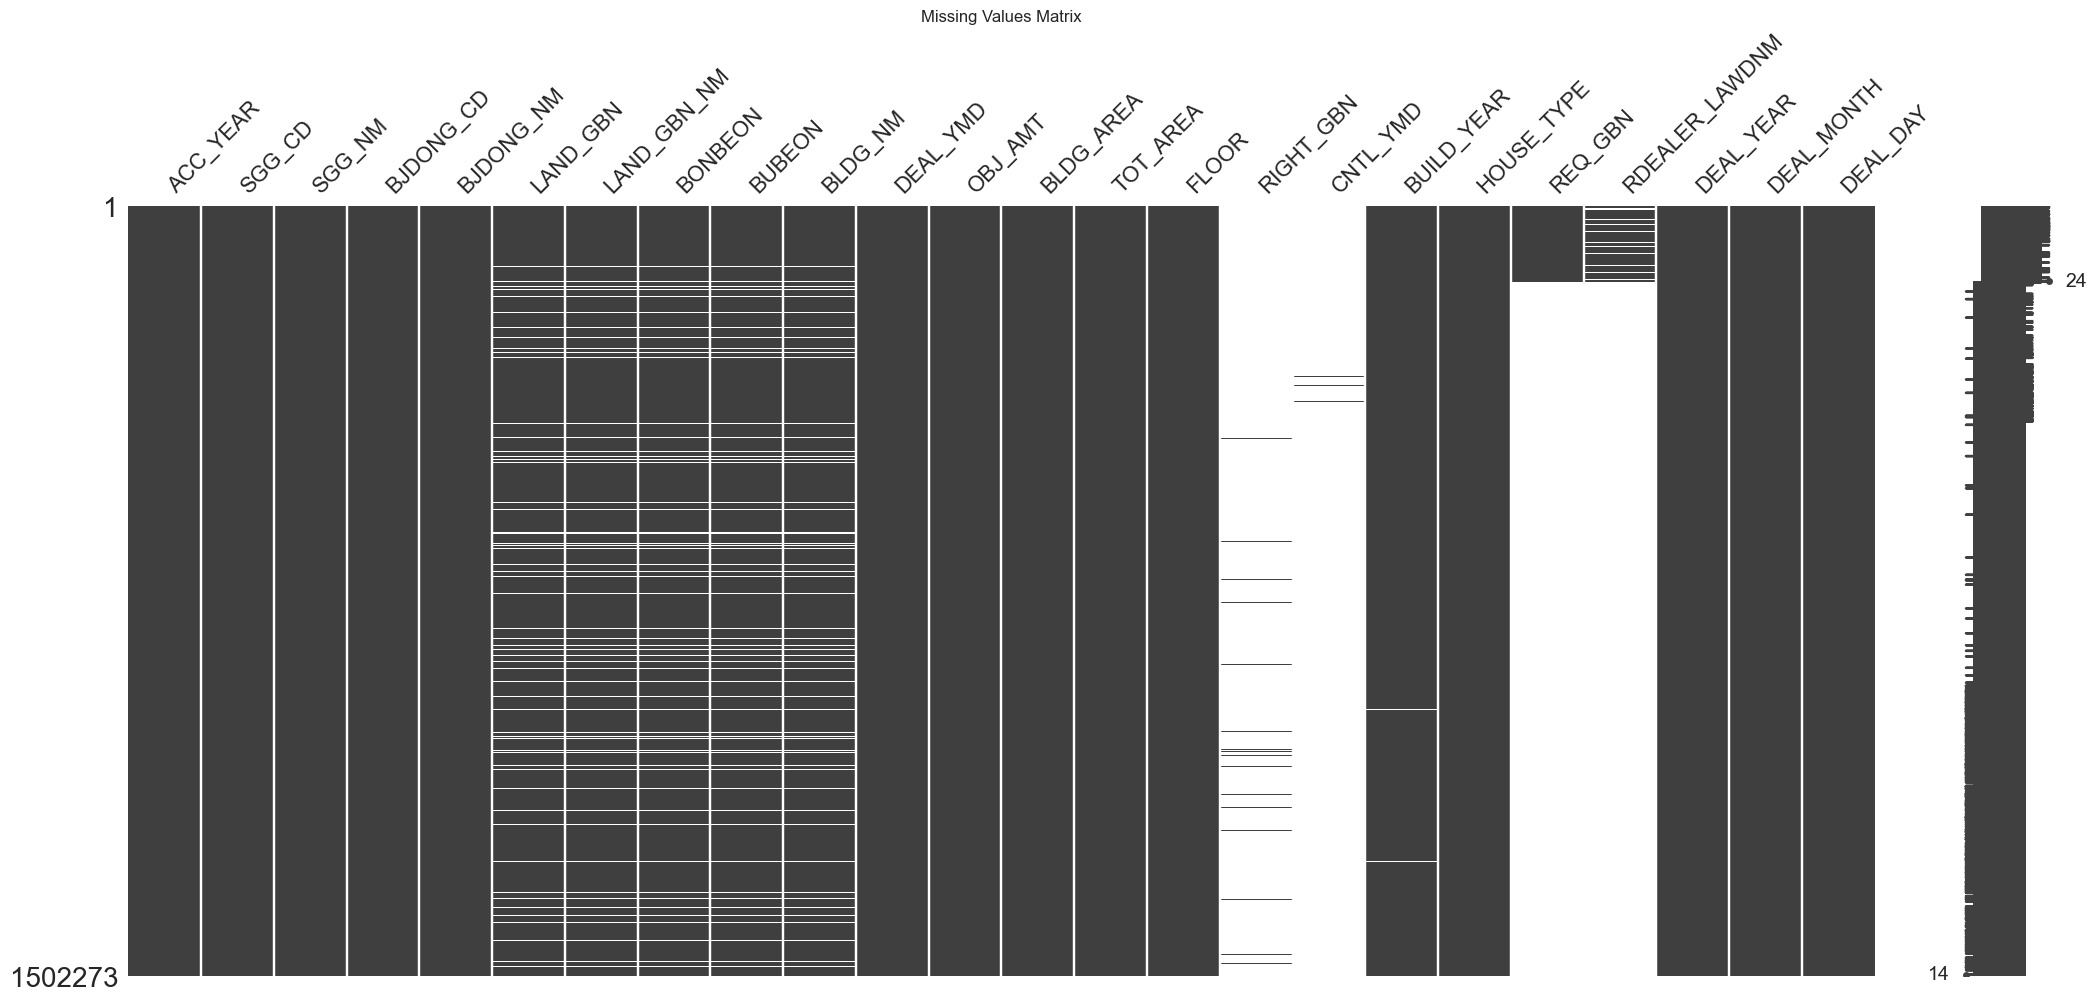

In [15]:
msno.matrix(data_df)
plt.title('Missing Values Matrix')
plt.show()

- LAND_GBN, LAND_GBN_NM, BONBEON, BUBEON, BLDG_NM 같은 행에 대해 결측치 존재
=> 확인 후 결측치를 대체할 지 삭제할 지 결정
- RIGHT_GBN,REQ_GBN, RDEALER_LAWDNM 는 결측치가 많으므로 해당 열 삭제
- CNTL_YMD의 경우 계약을 취소한 것이므로 계약일이 존재하는 거래 데이터 삭제 후 해당 열 삭제

### RIGHT_GBN,REQ_GBN, RDEALER_LAWDNM 삭제

In [16]:
data_df = data_df.drop(['RIGHT_GBN','REQ_GBN','RDEALER_LAWDNM'],axis=1)

In [17]:
data_df[~data_df['CNTL_YMD'].isna()]

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,DEAL_YEAR,DEAL_MONTH,DEAL_DAY
90,2024,11680,강남구,10100,역삼동,1.0,대지,698.0,26.0,더원스타빌,...,40500,29.63,18.99,4.0,20240111.0,2017.0,연립다세대,2024,1,9
97,2024,11530,구로구,10200,구로동,1.0,대지,1127.0,22.0,티타운빌딩,...,20000,42.11,60.43,5.0,20240110.0,2006.0,오피스텔,2024,1,9
277,2024,11470,양천구,10200,목동,1.0,대지,524.0,3.0,중앙하이츠에이동,...,34700,37.36,24.13,3.0,20240108.0,1992.0,연립다세대,2024,1,5
419,2024,11380,은평구,10800,역촌동,1.0,대지,25.0,47.0,로뎀빌(25-47),...,37000,41.27,26.80,5.0,20240105.0,2017.0,연립다세대,2024,1,3
438,2024,11470,양천구,10200,목동,1.0,대지,525.0,9.0,목동미소지음,...,30000,43.24,27.16,4.0,20240112.0,2007.0,연립다세대,2024,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421241,2020,11650,서초구,10800,서초동,1.0,대지,1507.0,14.0,(1507-14),...,64000,72.25,40.81,2.0,20200309.0,2009.0,연립다세대,2020,2,21
421284,2020,11350,노원구,10200,월계동,1.0,대지,13.0,0.0,미륭,...,64500,51.48,0.00,10.0,20200408.0,1986.0,아파트,2020,2,21
421313,2020,11350,노원구,10400,하계동,1.0,대지,271.0,3.0,건영,...,30000,45.55,0.00,1.0,20200612.0,1988.0,아파트,2020,2,21
421324,2020,11215,광진구,10100,중곡동,1.0,대지,564.0,7.0,럭스빌,...,23000,46.08,29.70,5.0,20200407.0,2012.0,연립다세대,2020,2,21


In [18]:
data_df = data_df.reset_index(drop = True)

In [19]:
data_df = data_df.drop(data_df[~data_df['CNTL_YMD'].isna()].index)
data_df

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,DEAL_YEAR,DEAL_MONTH,DEAL_DAY
0,2024,11530,구로구,10800,오류동,1.0,대지,6.0,244.0,J팰리스,...,18000,29.24,17.63,4.0,NaN,2011.0,연립다세대,2024,1,13
1,2024,11560,영등포구,12600,양평동2가,1.0,대지,43.0,14.0,CO-OP Residence/오목교,...,7600,16.98,26.58,9.0,NaN,2004.0,오피스텔,2024,1,12
2,2024,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,...,55200,37.08,156.00,0.0,NaN,1985.0,단독다가구,2024,1,12
3,2024,11680,강남구,10100,역삼동,1.0,대지,781.0,37.0,781-37,...,67000,44.85,25.88,3.0,NaN,2017.0,연립다세대,2024,1,12
4,2024,11380,은평구,10800,역촌동,1.0,대지,80.0,70.0,더라온,...,35000,54.37,33.25,4.0,NaN,2019.0,연립다세대,2024,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502268,2014,11545,금천구,10300,시흥동,NaN,NaN,NaN,NaN,NaN,...,35900,167.40,113.30,0.0,NaN,1988.0,단독다가구,2014,1,1
1502269,2014,11380,은평구,11400,진관동,1.0,대지,88.0,0.0,은평뉴타운 우물골(두산위브8단지),...,65500,134.43,0.00,10.0,NaN,2009.0,아파트,2014,1,1
1502270,2014,11380,은평구,11400,진관동,1.0,대지,102.0,0.0,은평뉴타운 박석고개(힐스테이트1단지),...,44700,84.72,0.00,12.0,NaN,2009.0,아파트,2014,1,1
1502271,2014,11380,은평구,11400,진관동,1.0,대지,11.0,0.0,은평뉴타운상림마을(현대아이파크B-13),...,59900,134.91,0.00,9.0,NaN,2008.0,아파트,2014,1,1


In [20]:
data_df = data_df.drop(['CNTL_YMD'], axis=1)
data_df

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,DEAL_YMD,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,BUILD_YEAR,HOUSE_TYPE,DEAL_YEAR,DEAL_MONTH,DEAL_DAY
0,2024,11530,구로구,10800,오류동,1.0,대지,6.0,244.0,J팰리스,20240113,18000,29.24,17.63,4.0,2011.0,연립다세대,2024,1,13
1,2024,11560,영등포구,12600,양평동2가,1.0,대지,43.0,14.0,CO-OP Residence/오목교,20240112,7600,16.98,26.58,9.0,2004.0,오피스텔,2024,1,12
2,2024,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,20240112,55200,37.08,156.00,0.0,1985.0,단독다가구,2024,1,12
3,2024,11680,강남구,10100,역삼동,1.0,대지,781.0,37.0,781-37,20240112,67000,44.85,25.88,3.0,2017.0,연립다세대,2024,1,12
4,2024,11380,은평구,10800,역촌동,1.0,대지,80.0,70.0,더라온,20240112,35000,54.37,33.25,4.0,2019.0,연립다세대,2024,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502268,2014,11545,금천구,10300,시흥동,NaN,NaN,NaN,NaN,NaN,20140101,35900,167.40,113.30,0.0,1988.0,단독다가구,2014,1,1
1502269,2014,11380,은평구,11400,진관동,1.0,대지,88.0,0.0,은평뉴타운 우물골(두산위브8단지),20140101,65500,134.43,0.00,10.0,2009.0,아파트,2014,1,1
1502270,2014,11380,은평구,11400,진관동,1.0,대지,102.0,0.0,은평뉴타운 박석고개(힐스테이트1단지),20140101,44700,84.72,0.00,12.0,2009.0,아파트,2014,1,1
1502271,2014,11380,은평구,11400,진관동,1.0,대지,11.0,0.0,은평뉴타운상림마을(현대아이파크B-13),20140101,59900,134.91,0.00,9.0,2008.0,아파트,2014,1,1


In [21]:
data_df[data_df['ACC_YEAR']!=data_df['DEAL_YEAR']]

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,DEAL_YMD,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,BUILD_YEAR,HOUSE_TYPE,DEAL_YEAR,DEAL_MONTH,DEAL_DAY
64,2023,11530,구로구,10200,구로동,1.0,대지,546.0,17.0,오크트리빌구로1차,20240109,29250,29.99,20.69,2.0,2023.0,연립다세대,2024,1,9
65,2023,11530,구로구,10200,구로동,1.0,대지,546.0,17.0,오크트리빌구로1차,20240109,37800,42.06,29.01,5.0,2023.0,연립다세대,2024,1,9
67,2023,11530,구로구,10200,구로동,1.0,대지,546.0,17.0,오크트리빌구로1차,20240109,26750,28.97,19.98,2.0,2023.0,연립다세대,2024,1,9
72,2023,11530,구로구,10200,구로동,1.0,대지,546.0,17.0,오크트리빌구로1차,20240109,24200,26.48,18.26,4.0,2023.0,연립다세대,2024,1,9
74,2023,11530,구로구,10200,구로동,1.0,대지,546.0,17.0,오크트리빌구로1차,20240109,27750,29.96,20.66,2.0,2023.0,연립다세대,2024,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487495,2013,11110,종로구,17500,숭인동,1.0,대지,1388.0,0.0,동양파라빌,20140210,11500,24.93,34.04,11.0,2005.0,오피스텔,2014,2,10
1490133,2017,11170,용산구,12900,이촌동,1.0,대지,412.0,0.0,이촌코오롱(A),20140204,67500,59.82,0.00,10.0,1999.0,아파트,2014,2,4
1496593,2015,11650,서초구,10800,서초동,1.0,대지,1684.0,0.0,서초4현대,20140117,78500,84.96,0.00,13.0,2000.0,아파트,2014,1,17
1501069,2015,11215,광진구,10300,구의동,1.0,대지,199.0,18.0,삼성쉐르빌,20140106,65000,156.73,0.00,8.0,2001.0,아파트,2014,1,6


### 접수연도 삭제
- 접수연도가 이를수록 거래 횟수가 많을수는 있으나 접수연도로 인하여 건물의 가격의 변동이 커질것이라고는 보이지 않음

In [22]:
data_df = data_df.drop(['ACC_YEAR'], axis = 1)
data_df

,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,DEAL_YMD,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,BUILD_YEAR,HOUSE_TYPE,DEAL_YEAR,DEAL_MONTH,DEAL_DAY
0,11530,구로구,10800,오류동,1.0,대지,6.0,244.0,J팰리스,20240113,18000,29.24,17.63,4.0,2011.0,연립다세대,2024,1,13
1,11560,영등포구,12600,양평동2가,1.0,대지,43.0,14.0,CO-OP Residence/오목교,20240112,7600,16.98,26.58,9.0,2004.0,오피스텔,2024,1,12
2,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,20240112,55200,37.08,156.00,0.0,1985.0,단독다가구,2024,1,12
3,11680,강남구,10100,역삼동,1.0,대지,781.0,37.0,781-37,20240112,67000,44.85,25.88,3.0,2017.0,연립다세대,2024,1,12
4,11380,은평구,10800,역촌동,1.0,대지,80.0,70.0,더라온,20240112,35000,54.37,33.25,4.0,2019.0,연립다세대,2024,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502268,11545,금천구,10300,시흥동,NaN,NaN,NaN,NaN,NaN,20140101,35900,167.40,113.30,0.0,1988.0,단독다가구,2014,1,1
1502269,11380,은평구,11400,진관동,1.0,대지,88.0,0.0,은평뉴타운 우물골(두산위브8단지),20140101,65500,134.43,0.00,10.0,2009.0,아파트,2014,1,1
1502270,11380,은평구,11400,진관동,1.0,대지,102.0,0.0,은평뉴타운 박석고개(힐스테이트1단지),20140101,44700,84.72,0.00,12.0,2009.0,아파트,2014,1,1
1502271,11380,은평구,11400,진관동,1.0,대지,11.0,0.0,은평뉴타운상림마을(현대아이파크B-13),20140101,59900,134.91,0.00,9.0,2008.0,아파트,2014,1,1


### 지번구분(LAND_GBN)과 지번구분명(LAND_GBN_NM)

In [52]:
data_df['LAND_GBN'].unique()

array([ 1., nan,  2.,  3.])

In [53]:
data_df['LAND_GBN_NM'].unique()

array(['대지', nan, '산', '블럭'], dtype=object)

In [55]:
data_df.columns

Index(['SGG_CD', 'SGG_NM', 'BJDONG_CD', 'BJDONG_NM', 'LAND_GBN', 'LAND_GBN_NM',
       'BONBEON', 'BUBEON', 'BLDG_NM', 'DEAL_YMD', 'OBJ_AMT', 'BLDG_AREA',
       'TOT_AREA', 'FLOOR', 'BUILD_YEAR', 'HOUSE_TYPE', 'DEAL_YEAR',
       'DEAL_MONTH', 'DEAL_DAY'],
      dtype='object')

In [23]:
data_df

,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,DEAL_YMD,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,BUILD_YEAR,HOUSE_TYPE,DEAL_YEAR,DEAL_MONTH,DEAL_DAY
0,11530,구로구,10800,오류동,1.0,대지,6.0,244.0,J팰리스,20240113,18000,29.24,17.63,4.0,2011.0,연립다세대,2024,1,13
1,11560,영등포구,12600,양평동2가,1.0,대지,43.0,14.0,CO-OP Residence/오목교,20240112,7600,16.98,26.58,9.0,2004.0,오피스텔,2024,1,12
2,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,20240112,55200,37.08,156.00,0.0,1985.0,단독다가구,2024,1,12
3,11680,강남구,10100,역삼동,1.0,대지,781.0,37.0,781-37,20240112,67000,44.85,25.88,3.0,2017.0,연립다세대,2024,1,12
4,11380,은평구,10800,역촌동,1.0,대지,80.0,70.0,더라온,20240112,35000,54.37,33.25,4.0,2019.0,연립다세대,2024,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502268,11545,금천구,10300,시흥동,NaN,NaN,NaN,NaN,NaN,20140101,35900,167.40,113.30,0.0,1988.0,단독다가구,2014,1,1
1502269,11380,은평구,11400,진관동,1.0,대지,88.0,0.0,은평뉴타운 우물골(두산위브8단지),20140101,65500,134.43,0.00,10.0,2009.0,아파트,2014,1,1
1502270,11380,은평구,11400,진관동,1.0,대지,102.0,0.0,은평뉴타운 박석고개(힐스테이트1단지),20140101,44700,84.72,0.00,12.0,2009.0,아파트,2014,1,1
1502271,11380,은평구,11400,진관동,1.0,대지,11.0,0.0,은평뉴타운상림마을(현대아이파크B-13),20140101,59900,134.91,0.00,9.0,2008.0,아파트,2014,1,1


In [25]:
data_df['HOUSE_TYPE'].unique()

array(['연립다세대', '오피스텔', '단독다가구', '아파트'], dtype=object)